<a href="https://colab.research.google.com/github/jarreed0/school_stuff/blob/main/starter_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
#!pip install geopandas
#import geopandas as geo

housing = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

housing.describe()


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.000000e+04,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,2.000000e+04
mean,4.580297e+09,3.370200,2.115750,2079.883100,1.501533e+04,1.49645,0.007550,0.234900,3.409700,7.657700,1790.232900,289.650200,1971.100150,82.732150,98077.876850,47.559970,-122.213897,1986.387500,12748.96040,5.394367e+05
std,2.875295e+09,0.931931,0.770134,919.433672,3.970135e+04,0.54095,0.086564,0.767692,0.651895,1.175287,829.587101,441.537072,29.374008,397.872344,53.438026,0.138517,0.140649,685.211515,27076.48904,3.664334e+05
min,1.000102e+06,0.000000,0.000000,290.000000,5.200000e+02,1.00000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.00000,7.500000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.00000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.750000,0.000000,98033.000000,47.470675,-122.328000,1490.000000,5100.00000,3.220000e+05
50%,3.904955e+09,3.000000,2.250000,1910.000000,7.620000e+03,1.50000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571450,-122.230000,1840.000000,7622.00000,4.500000e+05
75%,7.309825e+09,4.000000,2.500000,2550.000000,1.071000e+04,2.00000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98117.000000,47.678000,-122.124000,2360.000000,10088.25000,6.416250e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.164794e+06,3.50000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.00000,7.700000e+06


In [14]:

for i in range(len(housing['date'])):
  housing['date'][i]=(int)(housing['date'][i][:-7])

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
housing['lat'] = scaler.fit_transform(housing[['lat']])
housing['long'] = scaler.fit_transform(housing[['long']])

housing['bedrooms'] = scaler.fit_transform(housing[['bedrooms']])
housing['sqft_living'] = scaler.fit_transform(housing[['sqft_living']])
housing['sqft_lot'] = scaler.fit_transform(housing[['sqft_lot']])
housing['floors'] = scaler.fit_transform(housing[['floors']])
housing['condition'] = scaler.fit_transform(housing[['condition']])
housing['grade'] = scaler.fit_transform(housing[['grade']])
housing['sqft_above'] = scaler.fit_transform(housing[['sqft_above']])
housing['sqft_basement'] = scaler.fit_transform(housing[['sqft_basement']])
housing['sqft_living15'] = scaler.fit_transform(housing[['sqft_living15']])
housing['sqft_lot15'] = scaler.fit_transform(housing[['sqft_lot15']])


housing.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,1565930130,20141104,0.121212,3.25,0.261887,0.003569,0.4,0,0,0.50,0.583333,0.268640,0.211618,2007,0,98038,0.370436,0.391196,0.495784,0.003885,429900.0
1,3279000420,20150115,0.090909,1.75,0.088302,0.006253,0.0,0,0,0.25,0.500000,0.082237,0.087137,1979,0,98023,0.237414,0.113787,0.156772,0.008287,233000.0
2,194000575,20141014,0.121212,1.00,0.079245,0.004535,0.2,0,2,0.50,0.500000,0.115132,0.000000,1914,0,98116,0.659321,0.107973,0.258303,0.005915,455000.0
3,2115510160,20141208,0.090909,1.75,0.086792,0.006468,0.0,0,0,0.50,0.583333,0.126096,0.000000,1985,0,98023,0.261863,0.107143,0.239374,0.007854,258950.0
4,7522500005,20140815,0.060606,1.50,0.112453,0.003633,0.0,0,0,0.75,0.500000,0.086623,0.145228,1947,0,98117,0.852501,0.102990,0.222165,0.006101,555000.0


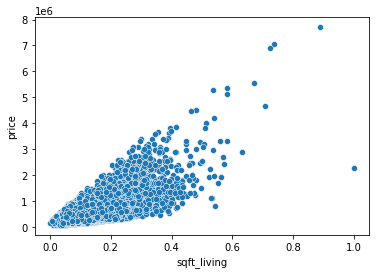

In [3]:
import seaborn as sns
sns.scatterplot(data=housing, x='sqft_living', y='price')

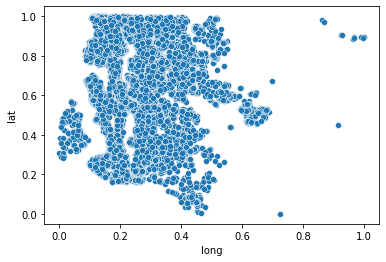

In [8]:
sns.scatterplot(data=housing, x='long', y='lat')

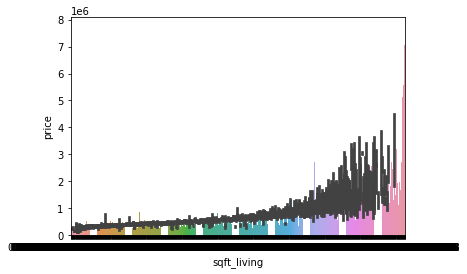

In [9]:
sns.barplot(data=housing, x='sqft_living', y='price')

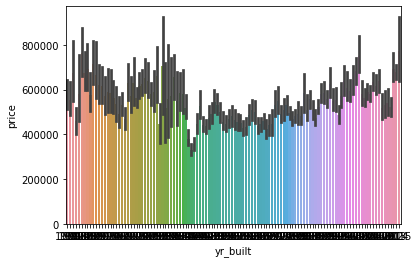

In [10]:
sns.barplot(data=housing, x='yr_built', y='price')

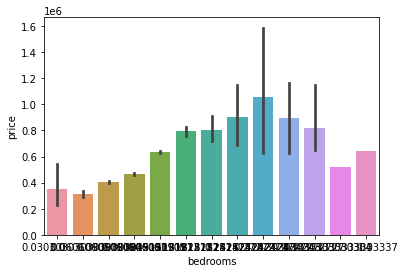

In [11]:
sns.barplot(data=housing, x='bedrooms', y='price')

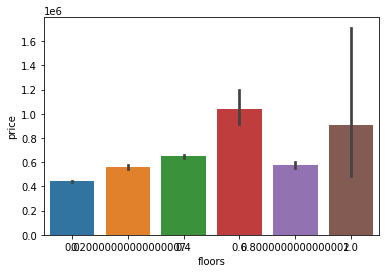

In [15]:
sns.barplot(data=housing, x='floors', y='price')

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04
mean,4.580297e+09,0.102127,2.115750,0.135086,0.012450,0.19858,0.007550,0.234900,0.602425,0.554808,0.164499,0.060093,1971.100150,82.732150,98077.876850,0.649943,0.253408,0.273169,0.013897,5.394367e+05
std,2.875295e+09,0.028240,0.770134,0.069391,0.034100,0.21638,0.086564,0.767692,0.162974,0.097941,0.090963,0.091605,29.374008,397.872344,53.438026,0.222803,0.116818,0.117916,0.031103,3.664334e+05
min,1.000102e+06,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,98001.000000,0.000000,0.000000,0.000000,0.000000,7.500000e+04
25%,2.123049e+09,0.090909,1.750000,0.086038,0.003882,0.00000,0.000000,0.000000,0.500000,0.500000,0.099781,0.000000,1951.750000,0.000000,98033.000000,0.506313,0.158638,0.187747,0.005111,3.220000e+05
50%,3.904955e+09,0.090909,2.250000,0.122264,0.006098,0.20000,0.000000,0.000000,0.500000,0.500000,0.139254,0.000000,1975.000000,0.000000,98065.000000,0.668409,0.240033,0.247978,0.008008,4.500000e+05
75%,7.309825e+09,0.121212,2.500000,0.170566,0.008752,0.40000,0.000000,0.000000,0.750000,0.583333,0.210526,0.116183,1997.000000,0.000000,98117.000000,0.839794,0.328073,0.337463,0.010841,6.416250e+05
max,9.900000e+09,1.000000,8.000000,1.000000,1.000000,1.00000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,2015.000000,2015.000000,98199.000000,1.000000,1.000000,1.000000,1.000000,7.700000e+06


In [4]:
X = housing[['id','date','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15']]
y = housing[['price']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)


In [5]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train.values.ravel())

test_predictions = clf.predict(X_test)

X_test

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5547,255370570,20141120,0.121212,3.50,0.181132,0.004332,0.4,0,0,0.50,0.500000,0.263158,0.000000,2007,0,98038,0.318160,0.416113,0.311650,0.003900
15091,3630120960,20140718,0.090909,3.25,0.221887,0.003848,0.4,0,0,0.50,0.666667,0.322368,0.000000,2006,0,98029,0.643236,0.429402,0.390811,0.003821
10678,732000160,20150429,0.060606,1.00,0.037736,0.007957,0.0,0,0,0.50,0.416667,0.054825,0.000000,1932,0,98155,0.977159,0.195183,0.335743,0.010856
6162,622049106,20141202,0.181818,2.50,0.232453,0.012974,0.0,0,0,0.50,0.583333,0.162281,0.331950,1964,0,98166,0.428502,0.146179,0.411461,0.017265
937,9828702055,20140508,0.060606,1.50,0.050566,0.001106,0.4,0,0,0.50,0.500000,0.073465,0.000000,1993,0,98122,0.743767,0.183555,0.153330,0.001168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19169,4351300978,20140826,0.121212,2.25,0.172830,0.017689,0.4,0,0,0.75,0.666667,0.251096,0.000000,1977,0,98040,0.644523,0.249169,0.394252,0.010929
9327,191100870,20140805,0.121212,2.50,0.175849,0.007734,0.6,0,0,0.75,0.666667,0.255482,0.000000,1974,0,98040,0.654978,0.249169,0.375323,0.010194
5312,1725079061,20140710,0.090909,1.75,0.101887,0.039960,0.0,0,0,0.50,0.500000,0.148026,0.000000,1989,0,98014,0.801190,0.480897,0.323696,0.229924
833,9320990140,20150422,0.090909,2.50,0.108679,0.003235,0.4,0,0,0.50,0.500000,0.157895,0.000000,1999,0,98148,0.444105,0.157807,0.237653,0.004241


In [6]:
from sklearn.metrics import accuracy_score, f1_score

f1_score(y_test, test_predictions, average='weighted')

0.006250580194898327

In [23]:
from sklearn.metrics import confusion_matrix, mean_absolute_error, mean_squared_error, r2_score

confusion_matrix(y_test, test_predictions)
#from sklearn.metrics import plot_confusion_matrix

#plot_confusion_matrix(clf, X_test, y_test, cmap='Blues')



array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [21]:
print('Mean absolute error:' , mean_absolute_error(y_test, test_predictions))
print('Mean squared error:' , mean_squared_error(y_test, test_predictions))
print('Root mean squared error:', mean_squared_error(y_test, test_predictions, squared=False))
print('R2 score:' , r2_score(y_test, test_predictions))

Mean absolute error: 176602.964
Mean squared error: 103861982088.6365
Root mean squared error: 322276.2512017237
R2 score: 0.2134677981686176
